In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [126]:
merged_df = pd.read_csv('../data/processed/merged_weather_data.csv')

In [127]:
merged_df.head()

,Unnamed: 0,date,pm25,pm10,o3,no2,so2,name,datetime,tempmax,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,0,11/09/2024,24,6,16,5,,utrecht,11/09/2024,14.5,...,17.3,7,10.0,2024-09-11T07:08:06,2024-09-11T20:02:59,0.25,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,remote
1,1,10/09/2024,26,16,27,3,,utrecht,10/09/2024,16.6,...,6.8,5,10.0,2024-09-10T07:06:28,2024-09-10T20:05:19,0.24,"Rain, Overcast",Cloudy skies throughout the day with rain.,rain,remote
2,2,09/09/2024,15,14,25,3,,utrecht,09/09/2024,20.2,...,16.0,6,10.0,2024-09-09T07:04:50,2024-09-09T20:07:39,0.21,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,remote
3,3,08/09/2024,17,12,31,9,,utrecht,08/09/2024,21.9,...,17.7,7,10.0,2024-09-08T07:03:12,2024-09-08T20:09:58,0.18,"Rain, Partially cloudy",Partly cloudy throughout the day with early mo...,rain,"06260099999,remote"
4,4,07/09/2024,25,13,34,3,,utrecht,07/09/2024,26.4,...,16.5,6,10.0,2024-09-07T07:01:34,2024-09-07T20:12:18,0.14,Overcast,Cloudy skies throughout the day.,cloudy,06260099999


In [128]:
merged_df.describe()

,Unnamed: 0,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,...,3670.000000,3670.000000,3670.000000,3670.000000,3653.000000,3670.000000,3670.000000,3670.000000,976.000000,3670.000000
mean,1834.500000,15.217602,7.310300,11.349837,14.635559,5.746185,10.273678,7.555313,79.676267,2.301063,...,20.585422,189.735014,1015.367738,72.935150,22.953052,148.234387,12.793624,4.909264,10.471311,0.482362
std,1059.582072,6.998231,5.634999,6.058699,7.779977,6.910861,7.186392,5.347161,10.200539,4.659164,...,7.585265,90.537940,9.902457,26.586774,10.032893,100.519043,8.686294,2.595717,4.092920,0.289026
min,0.000000,-4.800000,-15.100000,-8.300000,-10.700000,-24.000000,-16.000000,-13.500000,36.400000,0.000000,...,7.200000,0.100000,975.600000,0.000000,0.100000,1.100000,0.000000,0.000000,10.000000,0.000000
25%,917.250000,9.900000,3.200000,6.800000,8.200000,0.425000,4.600000,3.600000,73.200000,0.000000,...,14.400000,128.100000,1009.425000,57.800000,15.400000,51.500000,4.400000,3.000000,10.000000,0.250000
50%,1834.500000,14.900000,7.400000,11.100000,14.900000,5.700000,10.700000,7.700000,81.000000,0.100000,...,18.400000,206.400000,1016.050000,80.850000,23.000000,138.450000,12.000000,5.000000,10.000000,0.480000
75%,2751.750000,20.700000,11.700000,16.200000,20.700000,11.700000,16.200000,11.800000,87.400000,2.400000,...,25.200000,249.600000,1022.000000,95.000000,30.400000,232.275000,20.075000,7.000000,10.000000,0.750000
max,3669.000000,37.200000,23.700000,29.600000,39.600000,23.700000,29.700000,20.000000,99.800000,48.900000,...,64.800000,359.800000,1046.900000,100.000000,46.000000,360.000000,30.900000,9.000000,75.000000,0.980000


In [129]:
print(merged_df.columns)
print(len(merged_df.columns))

Index(['Unnamed: 0', 'date', ' pm25', ' pm10', ' o3', ' no2', ' so2', 'name',
       'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')
40


In [130]:
cols_to_drop = ["Unnamed: 0", 'name', 'datetime', 'sunrise', 'sunset', 'preciptype', 'conditions', 'description', 'icon', 'stations']
merged_df.drop(cols_to_drop, axis=1, inplace=True)

In [131]:
merged_df = merged_df.rename(columns={" pm25": "pm25", " pm10": "pm10", " o3": "o3", " no2": "no2", " so2": "so2"})

In [132]:
merged_df.describe()

,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
count,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,3670.000000,...,3670.000000,3670.000000,3670.000000,3670.000000,3653.000000,3670.000000,3670.000000,3670.000000,976.000000,3670.000000
mean,15.217602,7.310300,11.349837,14.635559,5.746185,10.273678,7.555313,79.676267,2.301063,51.389646,...,20.585422,189.735014,1015.367738,72.935150,22.953052,148.234387,12.793624,4.909264,10.471311,0.482362
std,6.998231,5.634999,6.058699,7.779977,6.910861,7.186392,5.347161,10.200539,4.659164,49.987496,...,7.585265,90.537940,9.902457,26.586774,10.032893,100.519043,8.686294,2.595717,4.092920,0.289026
min,-4.800000,-15.100000,-8.300000,-10.700000,-24.000000,-16.000000,-13.500000,36.400000,0.000000,0.000000,...,7.200000,0.100000,975.600000,0.000000,0.100000,1.100000,0.000000,0.000000,10.000000,0.000000
25%,9.900000,3.200000,6.800000,8.200000,0.425000,4.600000,3.600000,73.200000,0.000000,0.000000,...,14.400000,128.100000,1009.425000,57.800000,15.400000,51.500000,4.400000,3.000000,10.000000,0.250000
50%,14.900000,7.400000,11.100000,14.900000,5.700000,10.700000,7.700000,81.000000,0.100000,100.000000,...,18.400000,206.400000,1016.050000,80.850000,23.000000,138.450000,12.000000,5.000000,10.000000,0.480000
75%,20.700000,11.700000,16.200000,20.700000,11.700000,16.200000,11.800000,87.400000,2.400000,100.000000,...,25.200000,249.600000,1022.000000,95.000000,30.400000,232.275000,20.075000,7.000000,10.000000,0.750000
max,37.200000,23.700000,29.600000,39.600000,23.700000,29.700000,20.000000,99.800000,48.900000,100.000000,...,64.800000,359.800000,1046.900000,100.000000,46.000000,360.000000,30.900000,9.000000,75.000000,0.980000


In [133]:
merged_df.isnull().sum()

date                   0
pm25                   0
pm10                   0
o3                     0
no2                    0
so2                    0
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility            17
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2694
moonphase              0
dtype: int64

In [134]:
merged_df.loc[:, merged_df.columns != 'date'] = merged_df.loc[:, merged_df.columns != 'date'].apply(pd.to_numeric, errors='coerce')

In [135]:
merged_df.isnull().sum()

date                   0
pm25                 353
pm10                  29
o3                   152
no2                   26
so2                 3402
tempmax                0
tempmin                0
temp                   0
feelslikemax           0
feelslikemin           0
feelslike              0
dew                    0
humidity               0
precip                 0
precipprob             0
precipcover            0
snow                   0
snowdepth              0
windgust               0
windspeed              0
winddir                0
sealevelpressure       0
cloudcover             0
visibility            17
solarradiation         0
solarenergy            0
uvindex                0
severerisk          2694
moonphase              0
dtype: int64

In [136]:
merged_df.loc[:, merged_df.columns != 'date']

,pm25,pm10,o3,no2,so2,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
0,24.0,6.0,16.0,5.0,NaN,14.5,9.2,11.8,14.5,7.8,...,23.0,265.1,1005.1,83.8,14.7,203.2,17.3,7,10.0,0.25
1,26.0,16.0,27.0,3.0,NaN,16.6,12.4,14.7,16.6,12.4,...,28.4,227.0,1007.8,95.0,20.4,78.8,6.8,5,10.0,0.24
2,15.0,14.0,25.0,3.0,NaN,20.2,14.0,16.4,20.2,14.0,...,22.3,308.3,1004.8,87.9,21.5,186.1,16.0,6,10.0,0.21
3,17.0,12.0,31.0,9.0,NaN,21.9,14.9,19.5,21.9,14.9,...,22.3,179.0,1007.8,83.7,37.4,203.7,17.7,7,10.0,0.18
4,25.0,13.0,34.0,3.0,NaN,26.4,17.6,21.0,26.4,17.6,...,14.8,129.0,1011.2,90.3,23.3,191.1,16.5,6,10.0,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3665,NaN,17.0,11.0,17.0,1.0,7.7,3.2,5.3,5.1,-0.7,...,21.6,192.4,1009.2,27.9,23.3,72.1,6.1,3,NaN,0.08
3666,NaN,22.0,18.0,8.0,NaN,8.4,5.4,6.6,5.3,1.3,...,28.8,185.8,996.0,83.8,24.4,16.2,1.4,1,NaN,0.05
3667,NaN,48.0,22.0,6.0,NaN,7.1,-2.6,2.6,4.7,-5.5,...,21.6,153.1,1005.6,54.2,9.1,74.9,6.4,3,NaN,0.02
3668,NaN,38.0,17.0,21.0,1.0,4.4,-2.3,0.6,2.6,-7.2,...,18.0,90.7,1005.8,68.5,6.8,72.3,6.3,3,NaN,0.00


In [137]:
merged_df.loc[:, merged_df.columns != 'date'].corr()

,pm25,pm10,o3,no2,so2,tempmax,tempmin,temp,feelslikemax,feelslikemin,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,moonphase
pm25,1.000000,0.602256,-0.239142,0.397339,0.043948,-0.292657,-0.433593,-0.380453,-0.293394,-0.418904,...,-0.242720,-0.224898,0.273699,-0.105921,-0.599232,-0.223267,-0.223608,-0.208926,0.053256,0.070356
pm10,0.602256,1.000000,-0.146326,0.504230,0.085318,-0.114318,-0.244847,-0.190838,-0.116489,-0.227424,...,-0.199225,-0.157047,0.245881,-0.175147,-0.356120,-0.096728,-0.096607,-0.074031,0.112756,0.019664
o3,-0.239142,-0.146326,1.000000,-0.504952,0.000702,0.598919,0.412132,0.554532,0.576719,0.420426,...,-0.018002,-0.061901,0.036262,-0.274515,0.418317,0.635995,0.635805,0.607508,0.073061,0.029120
no2,0.397339,0.504230,-0.504952,1.000000,0.011526,-0.384038,-0.452636,-0.443772,-0.377191,-0.430329,...,-0.209492,-0.038009,0.146487,-0.087501,-0.350246,-0.372354,-0.372410,-0.357501,-0.025770,0.017764
so2,0.043948,0.085318,0.000702,0.011526,1.000000,0.044172,0.022914,0.036976,0.051829,0.036161,...,-0.045088,0.081692,0.030001,-0.007711,-0.102770,0.037961,0.036502,0.057910,NaN,0.078353
tempmax,-0.292657,-0.114318,0.598919,-0.384038,0.044172,1.000000,0.827853,0.966611,0.992650,0.860983,...,-0.171947,-0.000321,0.045065,-0.241759,0.353368,0.725768,0.725968,0.711391,0.182123,0.026409
tempmin,-0.433593,-0.244847,0.412132,-0.452636,0.022914,0.827853,1.000000,0.933635,0.828792,0.983523,...,-0.001961,0.146899,-0.157915,0.107111,0.284370,0.477110,0.477421,0.459094,0.145983,0.016530
temp,-0.380453,-0.190838,0.554532,-0.443772,0.036976,0.966611,0.933635,1.000000,0.962585,0.949186,...,-0.102057,0.071387,-0.039809,-0.097080,0.350323,0.656424,0.656644,0.635617,0.165569,0.021270
feelslikemax,-0.293394,-0.116489,0.576719,-0.377191,0.051829,0.992650,0.828792,0.962585,1.000000,0.866896,...,-0.189728,0.007390,0.048812,-0.221496,0.336595,0.714992,0.715201,0.703031,0.181115,0.025845
feelslikemin,-0.418904,-0.227424,0.420426,-0.430329,0.036161,0.860983,0.983523,0.949186,0.866896,1.000000,...,-0.097951,0.144407,-0.098968,0.066143,0.281255,0.527674,0.528024,0.511761,0.144454,0.013608


In [138]:
corr_no2 = abs(merged_df.loc[:, merged_df.columns != 'date'].corr()['no2'])
corr_o3 = abs(merged_df.loc[:, merged_df.columns != 'date'].corr()['o3'])

In [142]:
columns_above_threshold = (corr_no2 > 0.3) | (corr_o3 > 0.3)

selected_columns = columns_above_threshold[columns_above_threshold].index

In [143]:
selected_columns

Index(['pm25', 'pm10', 'o3', 'no2', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex'],
      dtype='object')

In [145]:
merged_df[selected_columns].corr()

,pm25,pm10,o3,no2,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,visibility,solarradiation,solarenergy,uvindex
pm25,1.000000,0.602256,-0.239142,0.397339,-0.292657,-0.433593,-0.380453,-0.293394,-0.418904,-0.373515,-0.361041,0.176888,-0.599232,-0.223267,-0.223608,-0.208926
pm10,0.602256,1.000000,-0.146326,0.504230,-0.114318,-0.244847,-0.190838,-0.116489,-0.227424,-0.183655,-0.212481,0.018161,-0.356120,-0.096728,-0.096607,-0.074031
o3,-0.239142,-0.146326,1.000000,-0.504952,0.598919,0.412132,0.554532,0.576719,0.420426,0.533337,0.355865,-0.586895,0.418317,0.635995,0.635805,0.607508
no2,0.397339,0.504230,-0.504952,1.000000,-0.384038,-0.452636,-0.443772,-0.377191,-0.430329,-0.424467,-0.378759,0.285015,-0.350246,-0.372354,-0.372410,-0.357501
tempmax,-0.292657,-0.114318,0.598919,-0.384038,1.000000,0.827853,0.966611,0.992650,0.860983,0.964205,0.849442,-0.494020,0.353368,0.725768,0.725968,0.711391
tempmin,-0.433593,-0.244847,0.412132,-0.452636,0.827853,1.000000,0.933635,0.828792,0.983523,0.922619,0.934513,-0.232992,0.284370,0.477110,0.477421,0.459094
temp,-0.380453,-0.190838,0.554532,-0.443772,0.966611,0.933635,1.000000,0.962585,0.949186,0.993463,0.924930,-0.411954,0.350323,0.656424,0.656644,0.635617
feelslikemax,-0.293394,-0.116489,0.576719,-0.377191,0.992650,0.828792,0.962585,1.000000,0.866896,0.969561,0.856916,-0.467012,0.336595,0.714992,0.715201,0.703031
feelslikemin,-0.418904,-0.227424,0.420426,-0.430329,0.860983,0.983523,0.949186,0.866896,1.000000,0.952301,0.945891,-0.241525,0.281255,0.527674,0.528024,0.511761
feelslike,-0.373515,-0.183655,0.533337,-0.424467,0.964205,0.922619,0.993463,0.969561,0.952301,1.000000,0.926982,-0.388878,0.334075,0.659855,0.660113,0.642116


In [172]:
to_remove = ['feelslikemax', 'feelslikemin', 'feelslike', 'tempmin', 'tempmax', 'dew', 'solarenergy', 'uvindex']
# removed solar energy and uv index instead of solar radiation because they have lower correlation with the targets no2 and o3
selected_columns = [item for item in selected_columns if item not in to_remove]

In [173]:
# Calculate the correlation matrix
corr_matrix = merged_df[selected_columns].corr()

# Set a threshold for correlation (e.g. 0.7)
threshold = 0.7

# Get the upper triangular part of the correlation matrix (to avoid duplicates)
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))




# Stack the remaining values into a long format (column pairs and correlation values)
column_pairs_with_values = upper_tri.stack()

# Print all column pairs and their corresponding correlation values
for (col1, col2), value in column_pairs_with_values.items():
    if value > threshold:
        print(f"({col1}, {col2}): {value}")

In [174]:
merged_df[selected_columns]

,pm25,pm10,o3,no2,temp,humidity,visibility,solarradiation
0,24.0,6.0,16.0,5.0,11.8,83.2,14.7,203.2
1,26.0,16.0,27.0,3.0,14.7,83.1,20.4,78.8
2,15.0,14.0,25.0,3.0,16.4,82.1,21.5,186.1
3,17.0,12.0,31.0,9.0,19.5,76.1,37.4,203.7
4,25.0,13.0,34.0,3.0,21.0,81.9,23.3,191.1
...,...,...,...,...,...,...,...,...
3665,NaN,17.0,11.0,17.0,5.3,79.7,23.3,72.1
3666,NaN,22.0,18.0,8.0,6.6,82.6,24.4,16.2
3667,NaN,48.0,22.0,6.0,2.6,84.0,9.1,74.9
3668,NaN,38.0,17.0,21.0,0.6,83.6,6.8,72.3


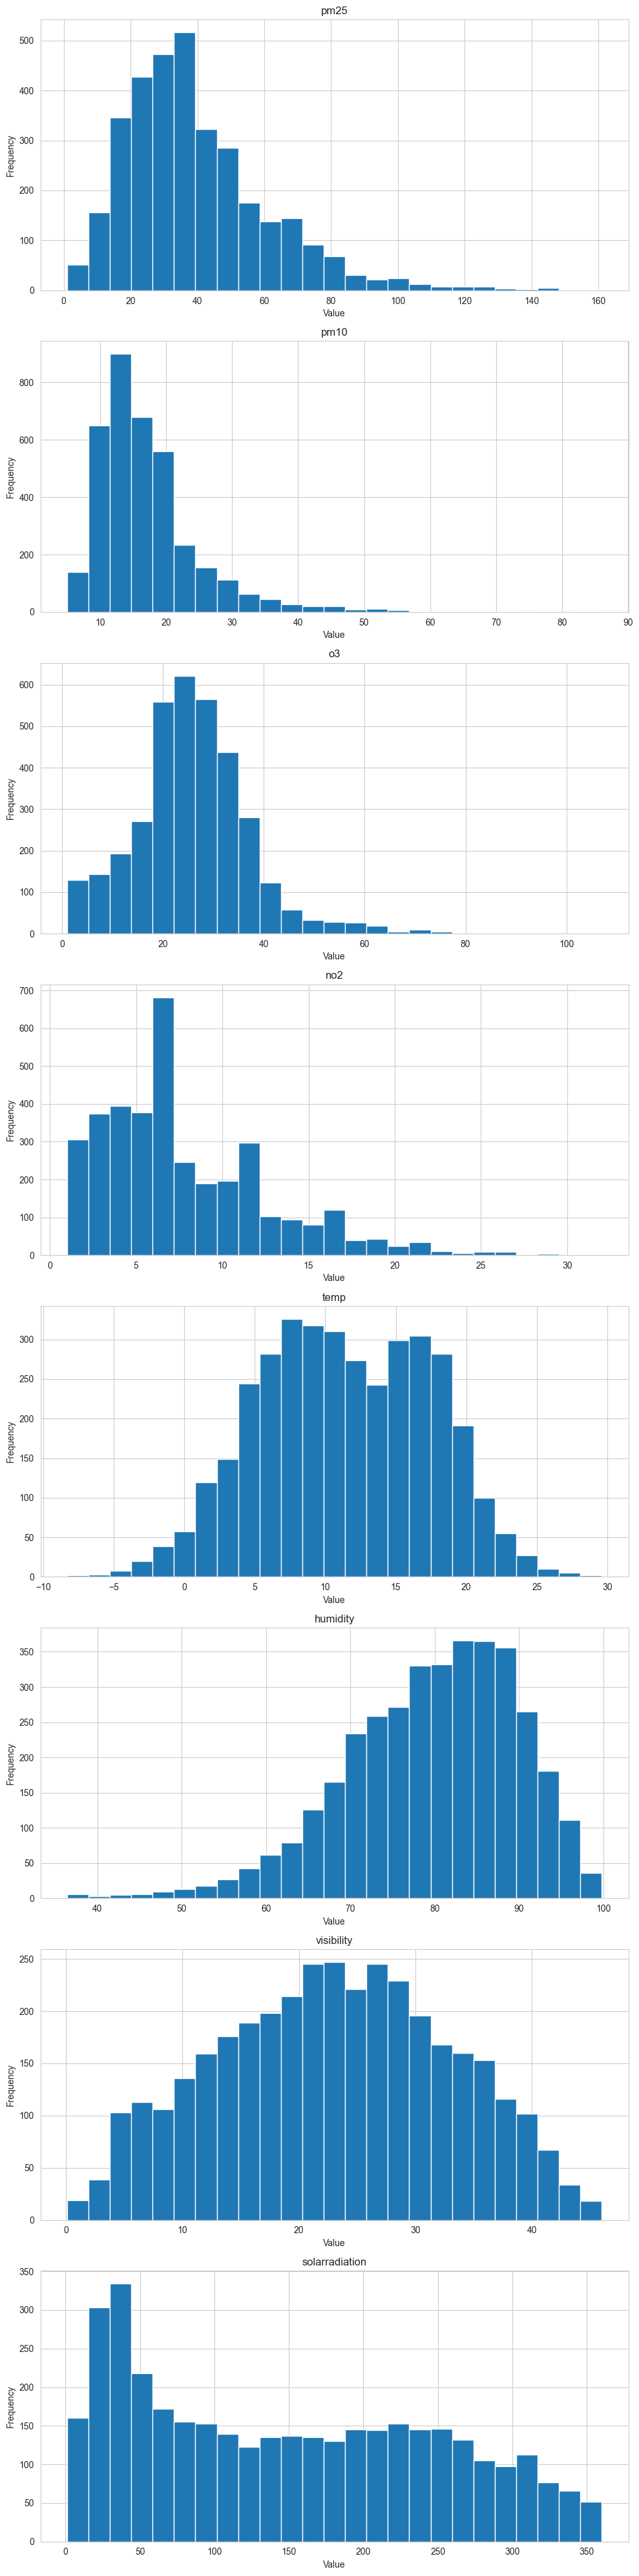

In [181]:
import matplotlib.pyplot as plt

# Create a figure with multiple subplots
fig, axs = plt.subplots(8, figsize=(10, 40))

# Create a histogram for each variable
for i, var in enumerate(selected_columns):
    axs[i].hist(merged_df[var], bins=25)
    axs[i].set_title(var)
    axs[i].set_xlabel('Value')
    axs[i].set_ylabel('Frequency')

# Layout so plots do not overlap
fig.tight_layout()

# Show the plot
plt.show()

In [182]:
merged_df[selected_columns].isnull().any()

pm25               True
pm10               True
o3                 True
no2                True
temp              False
humidity          False
visibility         True
solarradiation    False
dtype: bool

In [183]:
merged_df[selected_columns].to_csv('../data/processed/selected_features_with_missing.csv')